## Data Preprocessing

In [1]:
# Import the libraries
import os
import numpy as np 
import pandas as pd 
import c_visuals as vs
import matplotlib.pyplot as plt
import seaborn as sns  
from matplotlib.font_manager import FontProperties
plt.rcParams['font.sans-serif'] = ['Microsoft JhengHei'] 
plt.rcParams['axes.unicode_minus'] = False

In [2]:
# Change working directory
os.chdir('C:/Users/User/Desktop/Data&Code/Oversea/Oversea_2019')

In [3]:
# Import Data
Oversea = pd.read_excel('OVERSEE_2019_20200317_v0.xlsx')


# Group by created variables
bins = [0, 20, 40, 50, 60, 70, 120]
labels = ['0-19', '20-39', '40-49', '50-59', '60-69','70+']
Oversea_flat = Oversea.groupby(['Customer_ID','Target_Country'])['Buy_Amount'].sum().unstack()
Oversea_flat['Buy_Amount'] = Oversea.groupby(['Customer_ID'])['Buy_Amount'].sum()
Oversea_flat['Age'] = Oversea.groupby(['Customer_ID'])['Age'].first()
Oversea_flat['Gender'] = Oversea.groupby(['Customer_ID'])['Gender'].first()
Oversea_flat['Constellation'] = Oversea.groupby(['Customer_ID'])['Constellation'].first()
Oversea_flat['Com_ID'] = Oversea.groupby(['Customer_ID'])['Com_ID'].first()
Oversea_flat['Sales_ID'] = Oversea.groupby(['Customer_ID'])['Sales_ID'].first()
Oversea_flat.fillna(value=1, inplace=True)

# Age bin
Oversea_flat['Age_bins'] = pd.cut(x=Oversea_flat['Age'], bins = bins, labels = labels,include_lowest = True)
Oversea_flat.index = Oversea_flat.index.str.strip()
Oversea_flat.head()

Target_Country,印尼,新加坡,日本,泰國,深港通,滬港通,美國,香港,馬來西亞,Buy_Amount,Age,Gender,Constellation,Com_ID,Sales_ID,Age_bins
Customer_ID,,,,,,,,,,,,,,,,
18030553,3035868.0,1.0,17021298.0,1.0,1.0,1.0,19826394.0,1.0,1.0,39883560,20,OTHER,獅子座,5850,87321,0-19
24863147,1.0,1.0,1.0,1.0,1.0,1.0,469780.0,1.0,1.0,469780,5,OTHER,摩羯座,585U,86358,0-19
24912013,1.0,1.0,1.0,1.0,1.0,1.0,28080978.0,592968.0,1.0,28673946,5,OTHER,天秤座,5851,82319,0-19
25620512,1.0,1.0,1.0,1.0,1.0,1.0,1.0,87044679.0,1.0,87044679,11,OTHER,處女座,5850,87307,0-19
25637393,1.0,1.0,1.0,1.0,1.0,1.0,80928470.0,51509477.0,1.0,132437947,11,OTHER,射手座,5850,99136,0-19


In [4]:
# Sample number
Oversea_flat.shape

(865, 16)

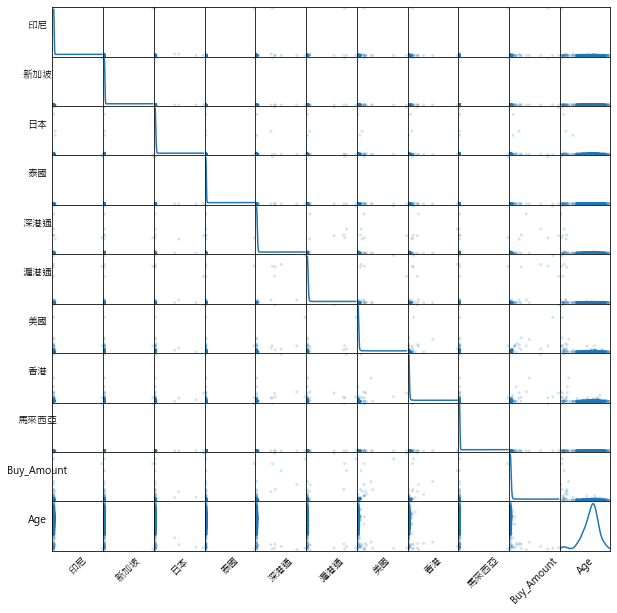

In [10]:
# Scatter_matrix plot of all features
Oversea_flat_numeric = Oversea_flat.iloc[:,:-5]
sm = pd.plotting.scatter_matrix(Oversea_flat_numeric, alpha=0.2, figsize=(10, 10), diagonal = 'kde')

# Change label rotation
[s.xaxis.label.set_rotation(45) for s in sm.reshape(-1)]
[s.yaxis.label.set_rotation(0) for s in sm.reshape(-1)]

# May need to offset label when rotating to prevent overlap of figure
[s.get_yaxis().set_label_coords(-0.3,0.5) for s in sm.reshape(-1)]

# Hide all ticks
[s.set_xticks(()) for s in sm.reshape(-1)]
[s.set_yticks(()) for s in sm.reshape(-1)]

# plt.show()
plt.savefig('Oversea_2019_Var.png')

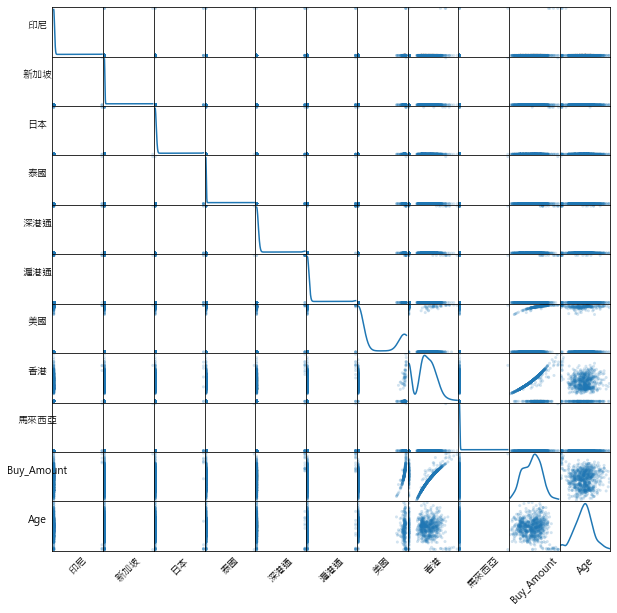

In [12]:
# Scale the data using the Box Cox method
from sklearn.preprocessing import PowerTransformer

bc = PowerTransformer(method='box-cox')
Oversea_scaled_features = bc.fit_transform(Oversea_flat_numeric.values)
Oversea_scaled_features_df = pd.DataFrame(Oversea_scaled_features, index=Oversea_flat_numeric.index,\
                                         columns=Oversea_flat_numeric.columns)
sm = pd.plotting.scatter_matrix(Oversea_scaled_features_df, alpha=0.2, figsize=(10, 10), diagonal = 'kde')

# Change label rotation
[s.xaxis.label.set_rotation(45) for s in sm.reshape(-1)]
[s.yaxis.label.set_rotation(0) for s in sm.reshape(-1)]

# May need to offset label when rotating to prevent overlap of figure
[s.get_yaxis().set_label_coords(-0.3,0.5) for s in sm.reshape(-1)]

# Hide all ticks
[s.set_xticks(()) for s in sm.reshape(-1)]
[s.set_yticks(()) for s in sm.reshape(-1)]

# plt.show()
plt.savefig('Oversea_2019_Var_Norm.png')

In [73]:
# Gender_df 
Gender_df = Oversea_flat.groupby('Gender').size().to_frame(name = 'Size')
Gender_df['Buy_Amount'] = Oversea_flat.groupby('Gender')['Buy_Amount'].sum()
Gender_df['Buy_Amount'] = Gender_df['Buy_Amount'].apply(lambda x: round(x, 0))
Gender_df

,Size,Buy_Amount
Gender,,
FEMALE,431,560134329
MALE,408,755633994
OTHER,26,3907594019


In [74]:
# Age df
Age_df = Oversea_flat.groupby('Age_bins').size().to_frame(name = 'Size')
Age_df['Buy_Amount'] = Oversea_flat.groupby('Age_bins')['Buy_Amount'].sum()
Age_df

,Size,Buy_Amount
Age_bins,,
0-19,29,3885184044
20-39,159,134283993
40-49,279,389701708
50-59,299,567293195
60-69,83,210168171
70+,16,36731231


In [5]:
# Age df without corporate customers
Corporate_filter = np.where(Oversea_flat.Gender == 'OTHER')[0]
Oversea_flat_wo_corp =  Oversea_flat.iloc[~Corporate_filter]

Age_df_wo_corp = Oversea_flat_wo_corp.groupby('Age_bins').size().to_frame(name = 'Size')
Age_df_wo_corp['Buy_Amount'] = Oversea_flat_wo_corp.groupby('Age_bins')['Buy_Amount'].sum()
Age_df_wo_corp

,Size,Buy_Amount
Age_bins,,
0-19,0,0
20-39,5,612863
40-49,10,18298882
50-59,8,13553673
60-69,2,4830636
70+,1,4870864


Text(0.5, 1.0, 'Oversea_2019_Age_distribution')

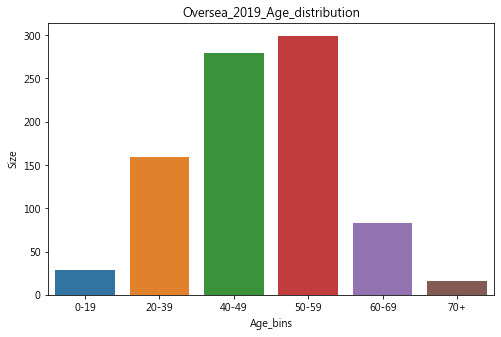

In [16]:
# Plot age distribution
plt.figure(figsize = (8,5))
sns.barplot(x = Age_df.index,y = Age_df['Size'])
plt.title('Oversea_2019_Age_distribution')

Text(0.5, 1.0, 'Oversea_2019_Age_buy_amount')

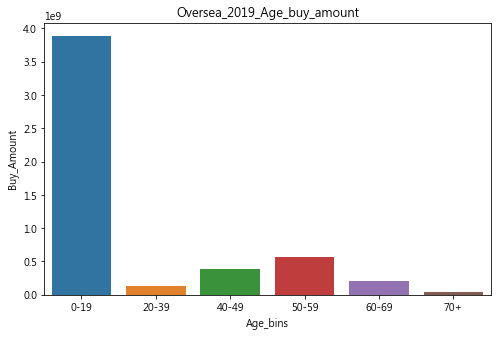

In [17]:
# Age_bin vs. Buy_amount barplot
plt.figure(figsize = (8,5))
sns.barplot(x = Age_df.index, y = Age_df.Buy_Amount)
plt.title('Oversea_2019_Age_buy_amount')

Text(0.5, 1.0, 'Oversea_2019_Age_buy_amount_n')

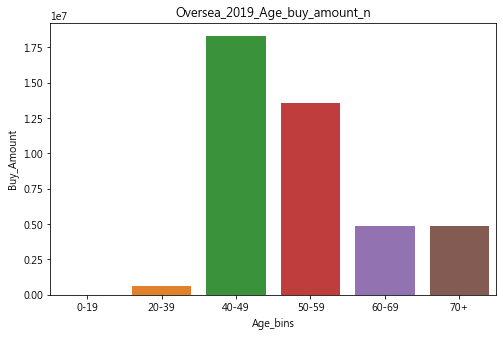

In [7]:
# Age_bin vs. Buy_amount barplot
plt.figure(figsize = (8,5))
sns.barplot(x = Age_df_wo_corp.index, y = Age_df_wo_corp.Buy_Amount)
plt.title('Oversea_2019_Age_buy_amount_n')

Text(0.5, 1.0, 'Oversea_2019_Age_Average_buy_amount')

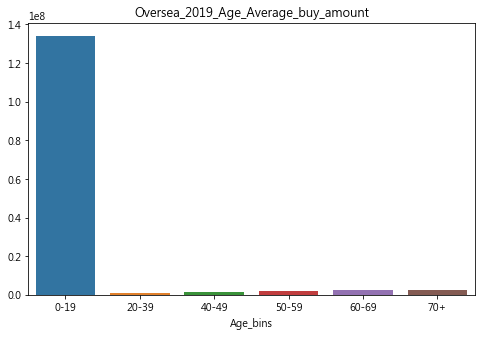

In [18]:
# Age_bin vs. Buy_amount barplot
plt.figure(figsize = (8,5))
sns.barplot(x = Age_df.index, y = Age_df.Buy_Amount / Age_df.Size)
plt.title('Oversea_2019_Age_Average_buy_amount')

Text(0.5, 1.0, 'Oversea_2019_Age_Average_buy_amount_n')

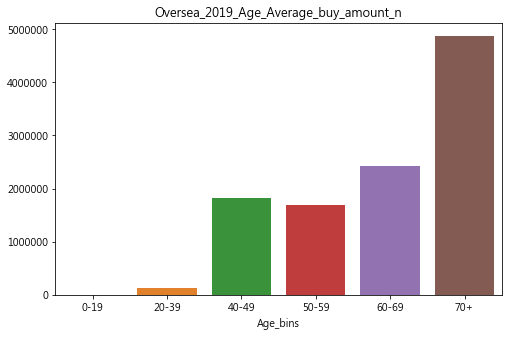

In [8]:
# Age_bin vs. Buy_amount barplot
plt.figure(figsize = (8,5))
sns.barplot(x = Age_df_wo_corp.index, y = Age_df_wo_corp.Buy_Amount / Age_df_wo_corp.Size)
plt.title('Oversea_2019_Age_Average_buy_amount_n')

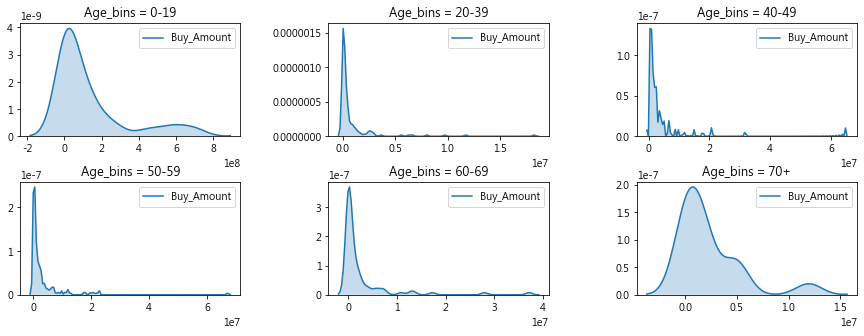

In [19]:
# Age bin kde plot
fig , ax = plt.subplots(figsize = (15,5))
fig.subplots_adjust(hspace=0.4, wspace=0.4)
for i,j in enumerate(np.sort(Oversea_flat.Age_bins.unique())):
    plt.subplot(2, 3, i+1)
    filter_ = Oversea_flat['Age_bins'] == j
    sns.kdeplot(Oversea_flat.loc[filter_].Buy_Amount, shade=True)
    plt.title("Age_bins = {}" .format(j))

## Outlier Detection

In [75]:
# Outlier detection
import xlsxwriter

# Create a new df with the descriptive features
Oversea_feat_w_prop_df = Oversea_flat

feature_outliers = []
writer = pd.ExcelWriter('Oversea_2019_Outliers_sheets.xlsx', engine='xlsxwriter')

for feature in Oversea_scaled_features_df.keys():
    Q1 = np.percentile(Oversea_scaled_features_df[feature], 25)
    Q3 = np.percentile(Oversea_scaled_features_df[feature], 75)
    step = 1.5*(Q3 - Q1)
    Outlier_Index = ~((Oversea_scaled_features_df[feature] >= Q1 - step)&\
                       (Oversea_scaled_features_df[feature] <= Q3 + step))
    Oversea_feat_w_prop_df.loc[Oversea_scaled_features_df.loc[Outlier_Index].index,:].groupby(['Customer_ID']).first()\
    .to_excel(writer, sheet_name = feature)
    feature_outliers.append(Oversea_feat_w_prop_df.loc[Oversea_scaled_features_df.loc[Outlier_Index].index,:])
writer.save()

# Flatten list of outliers
outliers_flattened = []

for i, j in enumerate(feature_outliers):
    outliers_flattened.append(feature_outliers[i].index)
flat_list = [item for sublist in outliers_flattened for item in sublist]

# Count the number of features for which a given observation is considered an outlier
from collections import Counter
outlier_count = Counter(flat_list)
outliers = [observation for observation in outlier_count.elements() if outlier_count[observation] >= 3]
Oversea_feat_w_prop_df.loc[Oversea_scaled_features_df.loc[outliers].index,:].groupby(['Customer_ID']).first()\
.to_csv('Oversea_2019_Outliers.csv', encoding='utf_8_sig')

In [76]:
# Drop the outliers
Oversea_flat = Oversea_flat.drop(['26318517', '31841577', '38592911', '42386152', '42539805', '72956685', '76332943'])

In [77]:
# Check for the 1 only eliminated buy 
for col in Oversea_flat:
    if len(Oversea_flat[col].unique().tolist()) == 1:
        print(col)
        print(Oversea_flat[col].unique().tolist())

新加坡
[1.0]
泰國
[1.0]
馬來西亞
[1.0]


In [79]:
# No need for Malaysia, Singapore, Thiland
drop_list = ['馬來西亞', '新加坡', '泰國']
Oversea_flat = Oversea_flat.drop(drop_list,axis = 1)

In [80]:
# Rescale data
Oversea_flat_numeric = Oversea_flat.iloc[:,:-5]
bc = PowerTransformer(method='box-cox')
Oversea_scaled_features = bc.fit_transform(Oversea_flat_numeric.values)
Oversea_scaled_features_df = pd.DataFrame(Oversea_scaled_features, index=Oversea_flat_numeric.index,\
                                         columns=Oversea_flat_numeric.columns)

## PCA vs. SVD

,Explained Var,印尼,日本,深港通,滬港通,美國,香港,Buy_Amount,Age
Dim 1,0.2293,0.2288,0.2404,0.4052,0.4137,0.5200,-0.3470,0.3715,-0.1604
Dim 2,0.2136,-0.2013,-0.1969,0.5475,0.5388,-0.3917,0.3933,0.0331,0.1462
Dim 3,0.1813,0.5502,0.5957,-0.0433,-0.0475,-0.3113,0.4397,0.1552,-0.1551
Dim 4,0.1381,0.2406,0.1398,0.1832,0.1831,-0.2184,-0.3952,-0.7856,-0.1853
Dim 5,0.1189,0.2936,0.1062,0.0225,-0.0010,0.0248,-0.1468,-0.0403,0.9371
Dim 6,0.0678,0.6782,-0.7191,-0.0148,-0.0068,0.0086,0.0638,0.0681,-0.1180
Dim 7,0.0373,0.0025,0.0082,-0.6959,0.7074,0.0743,0.0754,-0.0592,0.0231
Dim 8,0.0135,-0.0194,-0.0257,-0.1251,0.0481,-0.6522,-0.5866,0.4580,-0.0428


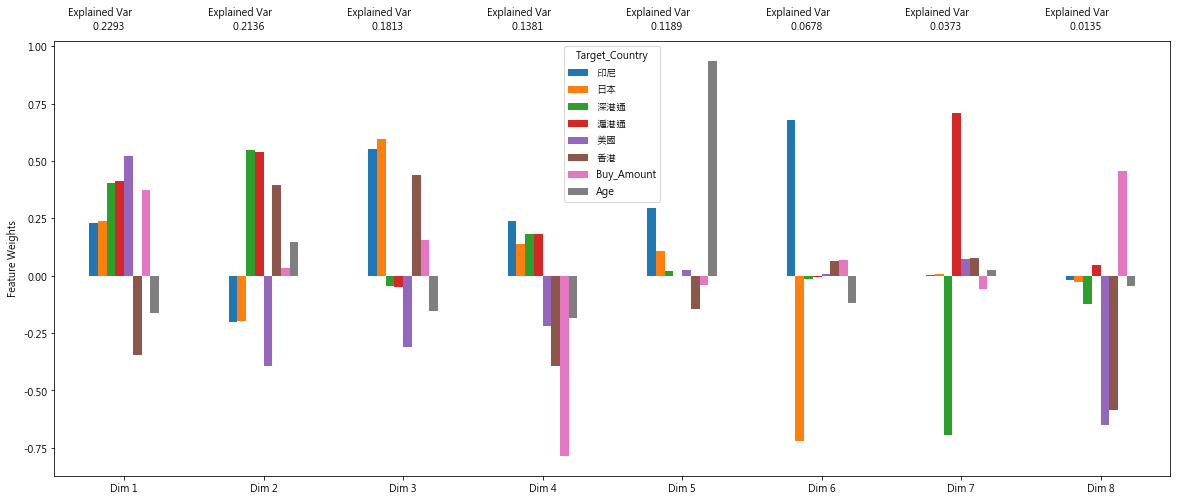

In [81]:
# PCA
from sklearn.decomposition import PCA

# Apply PCA by fitting the good data with the same number of dimensions as features
num_features = Oversea_scaled_features_df.shape[1]
pca = PCA(n_components = num_features, random_state = 0)
pca = pca.fit(Oversea_scaled_features_df)

# Transform log_samples using the PCA fit above

# Generate PCA results plot
vs.pca_results(Oversea_scaled_features_df, pca)

,Explained Var,印尼,日本,深港通,滬港通,美國,香港,Buy_Amount,Age
Dim 1,0.2293,0.2288,0.2404,0.4052,0.4137,0.5200,-0.3470,0.3715,-0.1604
Dim 2,0.2136,-0.2013,-0.1969,0.5475,0.5388,-0.3917,0.3933,0.0331,0.1462
Dim 3,0.1813,0.5502,0.5957,-0.0433,-0.0475,-0.3113,0.4397,0.1552,-0.1551
Dim 4,0.1381,0.2406,0.1398,0.1832,0.1831,-0.2184,-0.3952,-0.7856,-0.1853
Dim 5,0.1189,0.2936,0.1062,0.0225,-0.0010,0.0248,-0.1468,-0.0403,0.9371
Dim 6,0.0678,0.6782,-0.7191,-0.0148,-0.0068,0.0086,0.0638,0.0681,-0.1180
Dim 7,0.0373,0.0025,0.0082,-0.6959,0.7074,0.0743,0.0754,-0.0592,0.0231


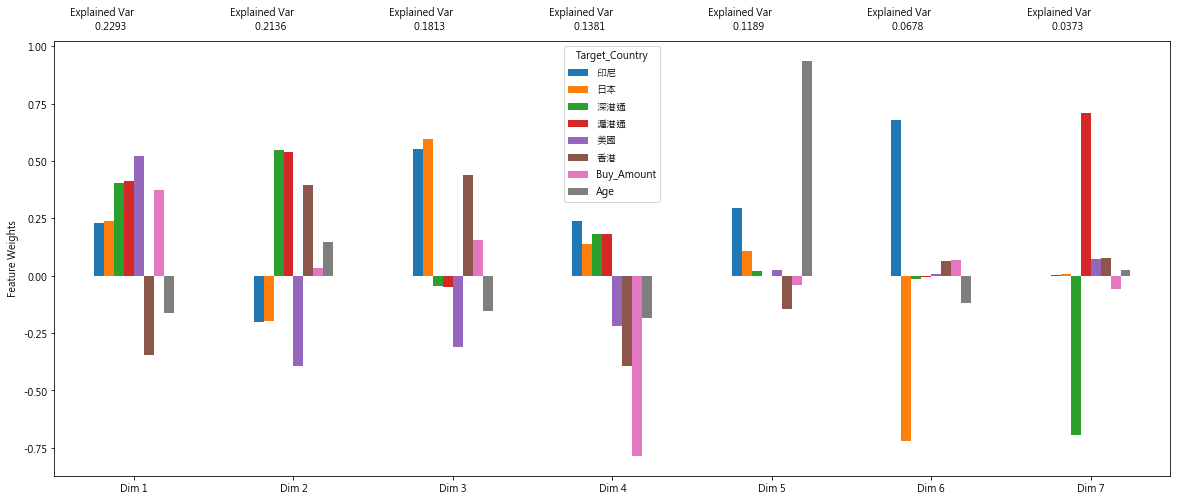

In [82]:
# SVD
from sklearn.decomposition import TruncatedSVD

# Apply PCA by fitting the good data with the same number of dimensions as features
num_features = Oversea_scaled_features_df.shape[1] - 1
svd = TruncatedSVD(n_components = num_features, random_state = 0)
svd = svd.fit(Oversea_scaled_features_df)

# Transform log_samples using the PCA fit above

# Generate PCA results plot
vs.pca_results(Oversea_scaled_features_df, svd)

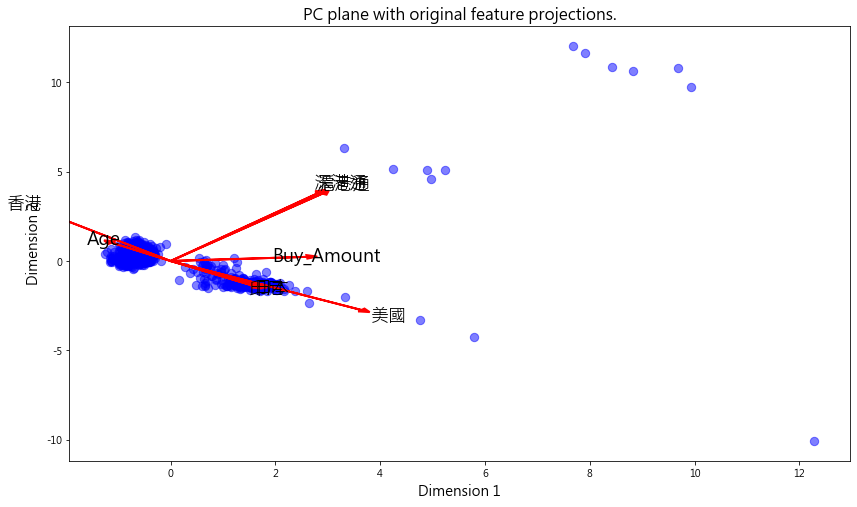

In [83]:
# Apply PCA by fitting data with only 2 Dimensions
pca = PCA(n_components = 2, random_state = 0)
pca = pca.fit(Oversea_scaled_features_df)

# Transform the good data using the PCA fit above
reduced_data = pca.transform(Oversea_scaled_features_df)

# Create a DataFrame for the reduced data
reduced_data = pd.DataFrame(reduced_data, columns = ['Dimension 1', 'Dimension 2'])

vs.biplot(Oversea_scaled_features_df ,reduced_data, pca)

## K means Clustering

In [81]:
# # Reduce Dimension
# pca = PCA(n_components = num_features - 3, random_state = 0)
# Reduced_Data = pca.fit_transform(Oversea_scaled_features_df)

# # Create a DataFrame for the reduced data
# Reduced_Data_df = pd.DataFrame(Reduced_Data, columns = \
#                                           ['Dimension 1', 'Dimension 2', 'Dimension 3', 'Dimension 4', \
#                                            'Dimension 5', 'Dimension 6', 'Dimension 7', 'Dimension 8'])

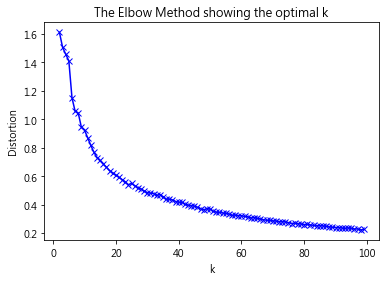

In [84]:
# clustering dataset
# determine k using elbow method

from sklearn.cluster import KMeans
from sklearn import metrics
from scipy.spatial.distance import cdist

# k means determine k
distortions = []
K = range(2,100)
for k in K:
    kmeanModel = KMeans(n_clusters=k).fit(Oversea_scaled_features_df)
    distortions.append(sum(np.min(cdist(Oversea_scaled_features_df, kmeanModel.cluster_centers_, 'euclidean'), axis=1)) / \
                       Oversea_scaled_features_df.shape[0])

# Plot the elbow
plt.plot(K, distortions, 'bx-')
plt.xlabel('k')
plt.ylabel('Distortion')
plt.title('The Elbow Method showing the optimal k')
plt.show()

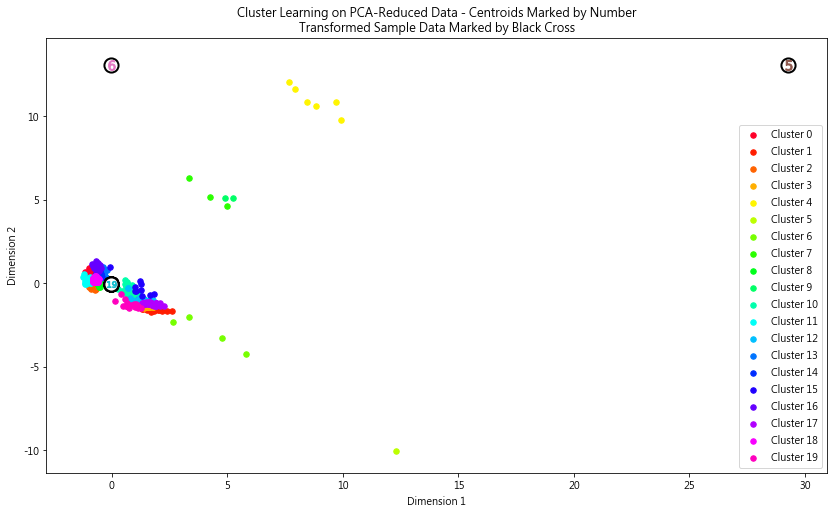

In [85]:
# Clustering(Elbow_method)
optimized_kmeans = KMeans(n_clusters = 20, random_state = 0).fit(Oversea_scaled_features_df)
kmeans_preds = optimized_kmeans.predict(Oversea_scaled_features_df)
kmeans_centers = optimized_kmeans.cluster_centers_
vs.cluster_results(reduced_data, kmeans_preds, kmeans_centers)

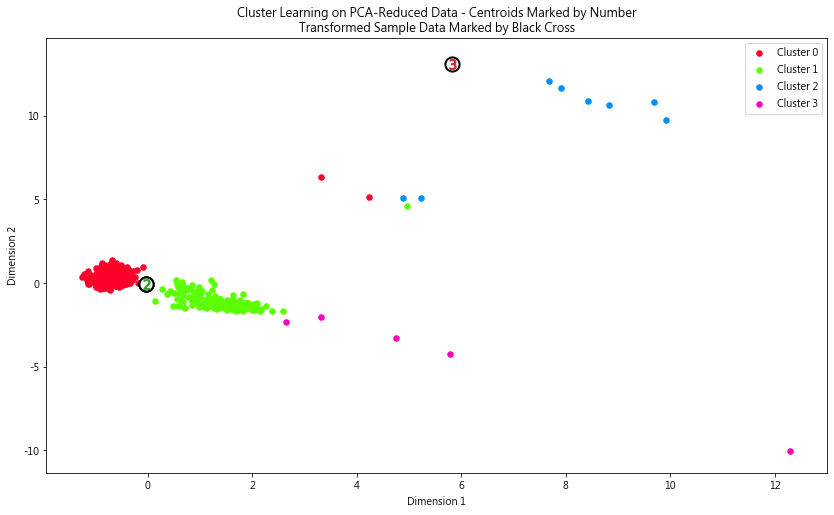

In [86]:
# Clustering(silhouette_score method)
# Clustering(silhouette_score method)
# silhouette_score method
num_clusters = np.arange(2,30)
kmeans_results = {}
for size in num_clusters:
    kmeans = KMeans(n_clusters = size).fit(Oversea_scaled_features_df)
    preds = kmeans.predict(Oversea_scaled_features_df)
    kmeans_results[size] = metrics.silhouette_score(Oversea_scaled_features_df, preds)
    
best_size = max(kmeans_results, key = kmeans_results.get)

optimized_kmeans = KMeans(n_clusters = best_size, random_state = 0).fit(Oversea_scaled_features_df)
kmeans_preds = optimized_kmeans.predict(Oversea_scaled_features_df)
kmeans_centers = optimized_kmeans.cluster_centers_
vs.cluster_results(reduced_data, kmeans_preds, kmeans_centers)

For n_clusters = 2 The average silhouette_score is : 0.4601349090410578
For n_clusters = 3 The average silhouette_score is : 0.4660416259663451
For n_clusters = 4 The average silhouette_score is : 0.4704459386255006
For n_clusters = 5 The average silhouette_score is : 0.47254219967256306
For n_clusters = 6 The average silhouette_score is : 0.3868550692573564
For n_clusters = 7 The average silhouette_score is : 0.39567097746074464
For n_clusters = 8 The average silhouette_score is : 0.3844657352712002
For n_clusters = 9 The average silhouette_score is : 0.3489727246032074
For n_clusters = 10 The average silhouette_score is : 0.37018524930831986
For n_clusters = 11 The average silhouette_score is : 0.3780135257093273


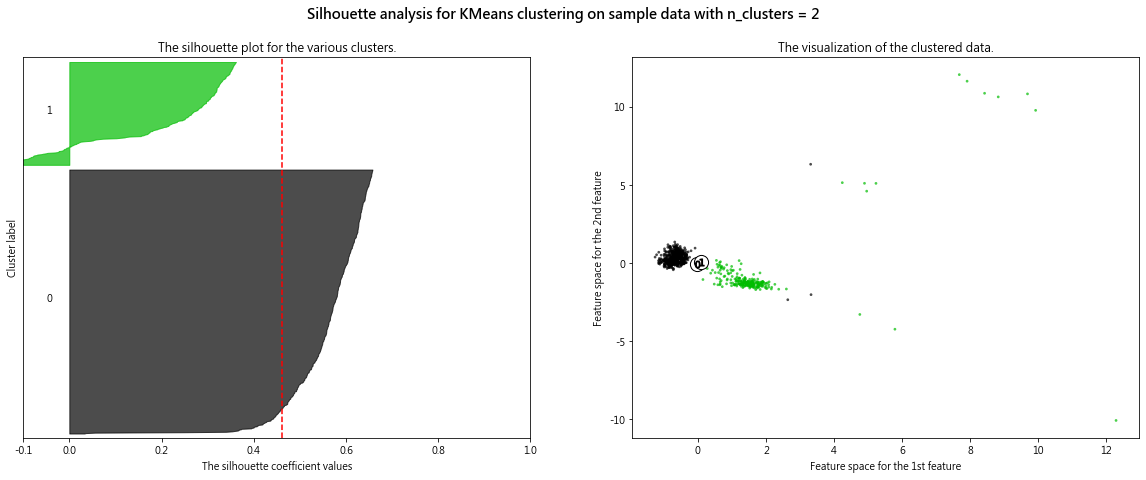

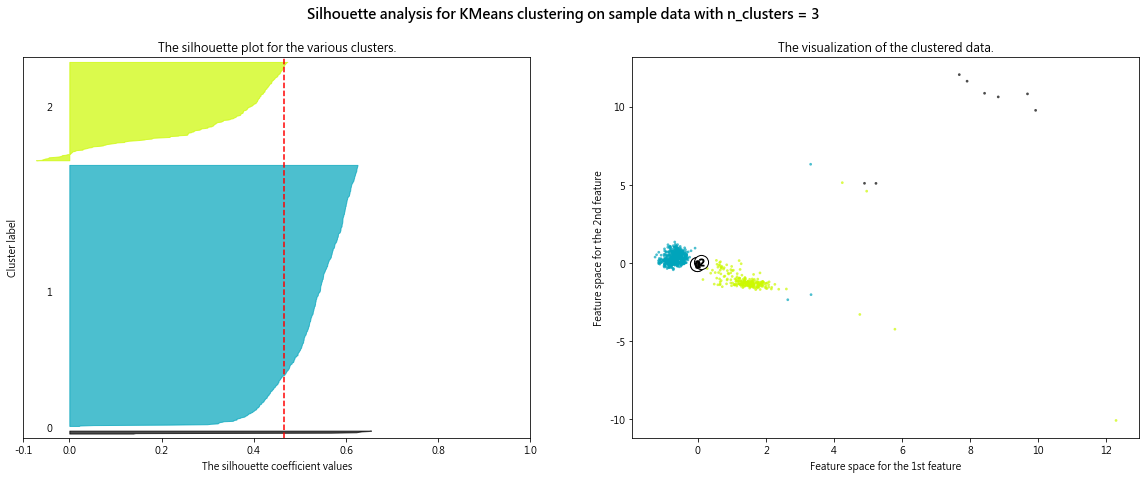

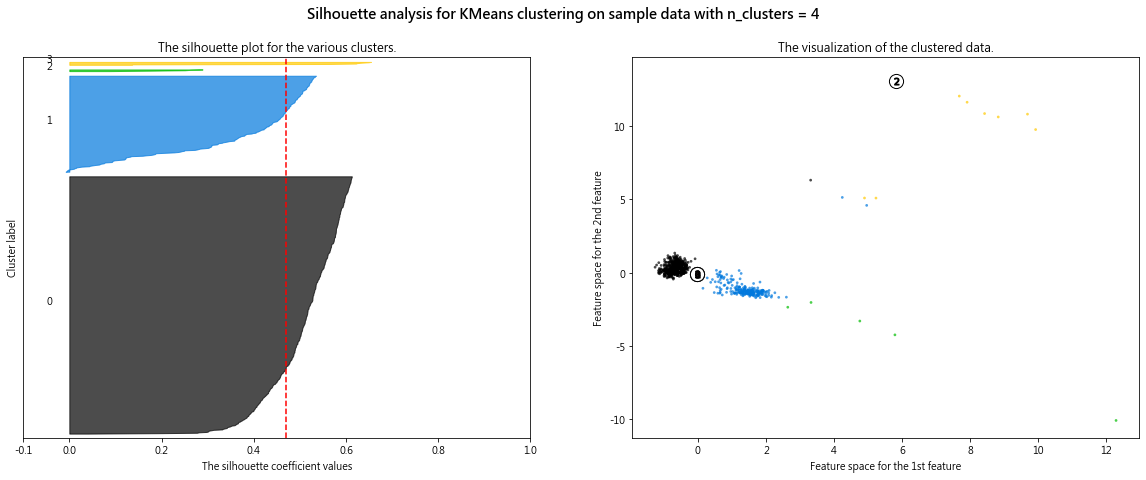

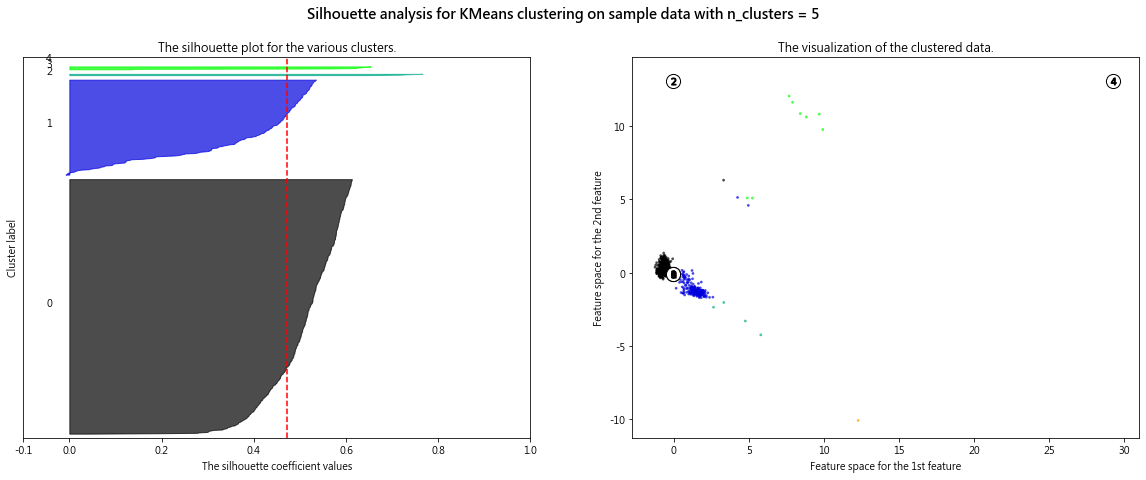

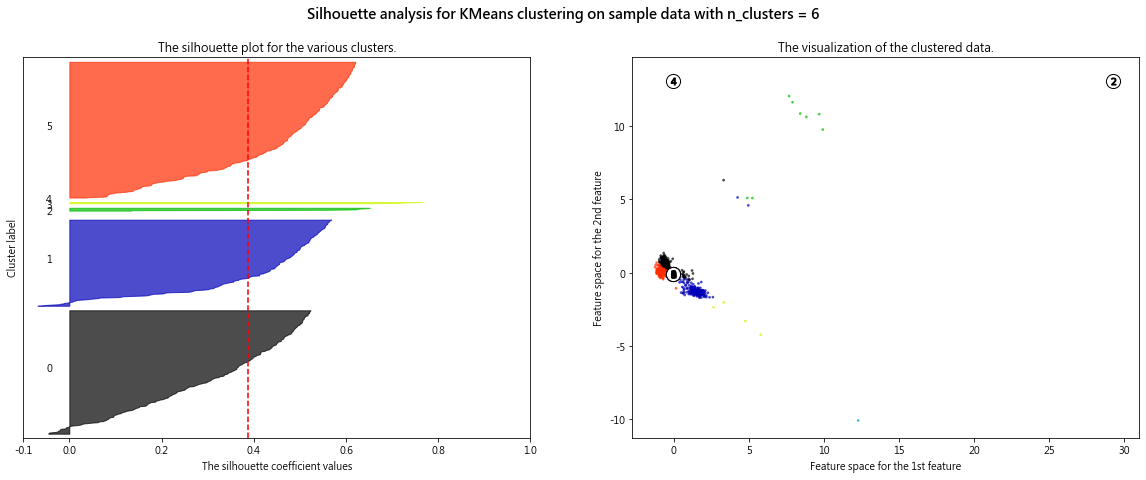

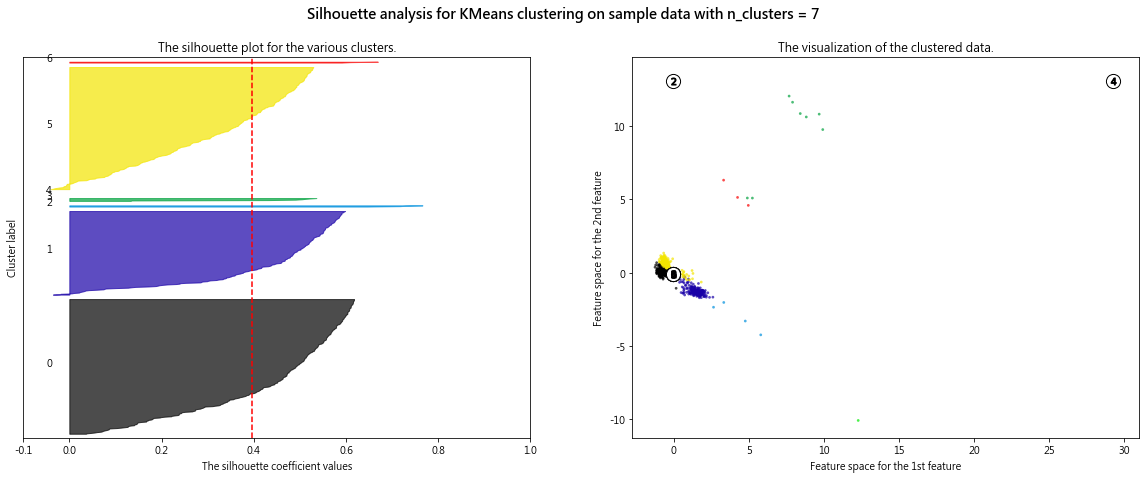

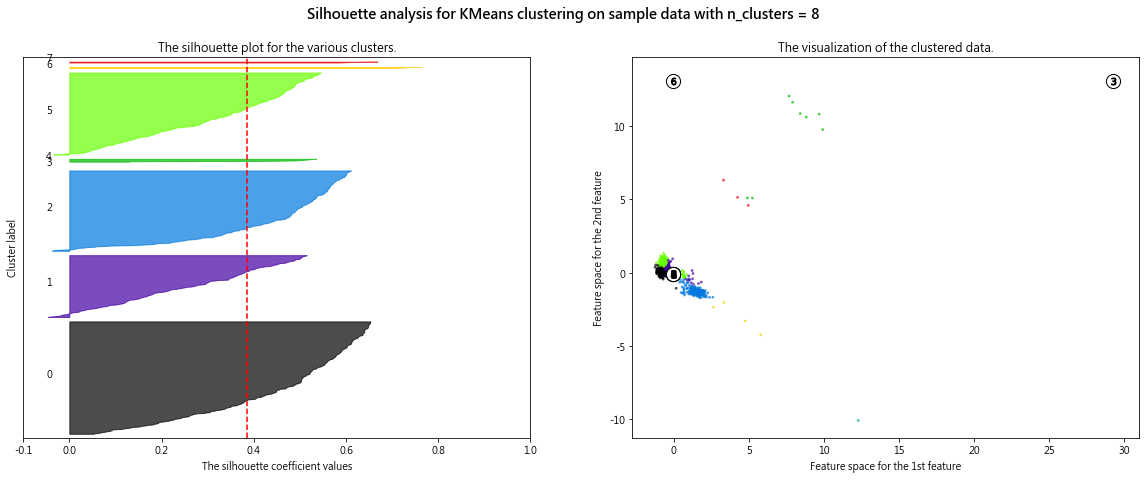

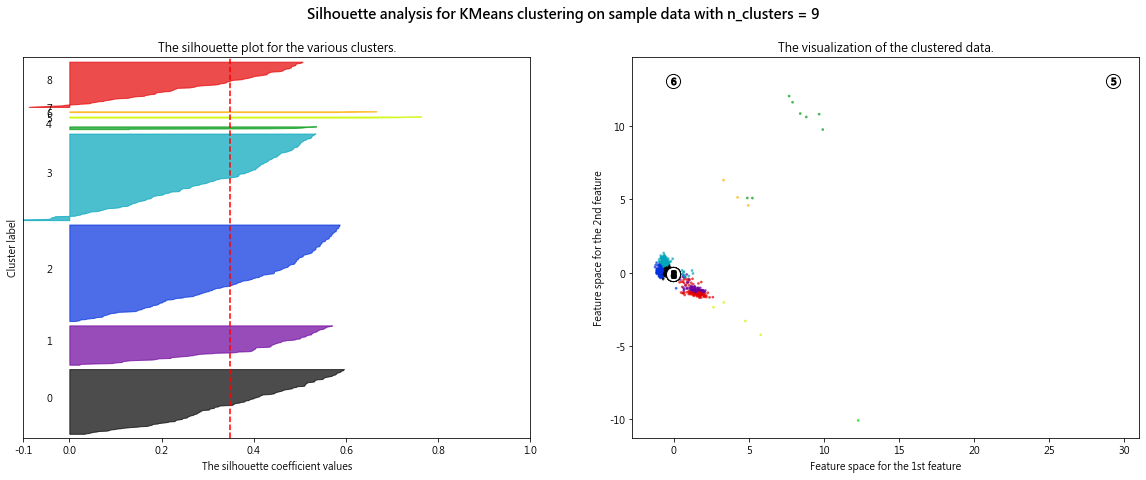

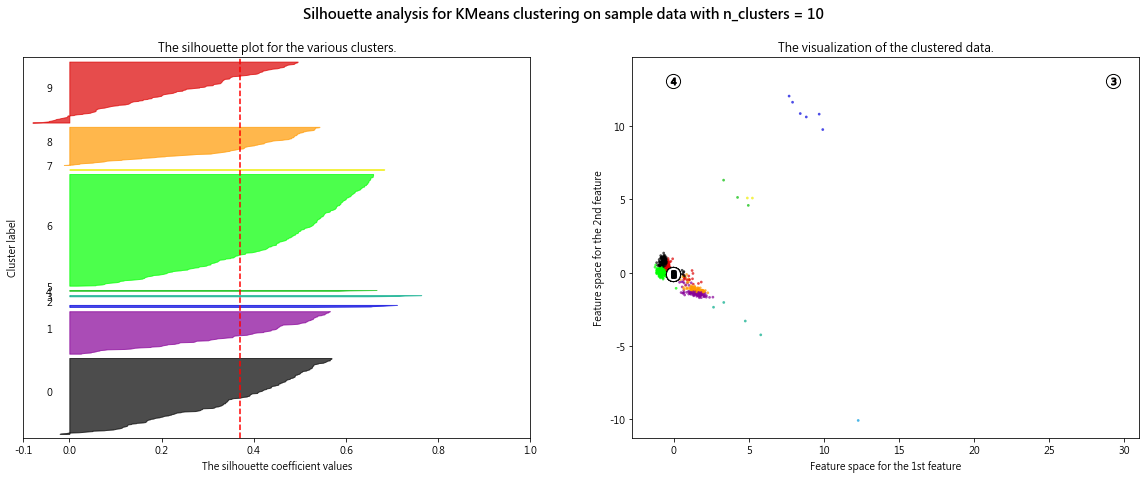

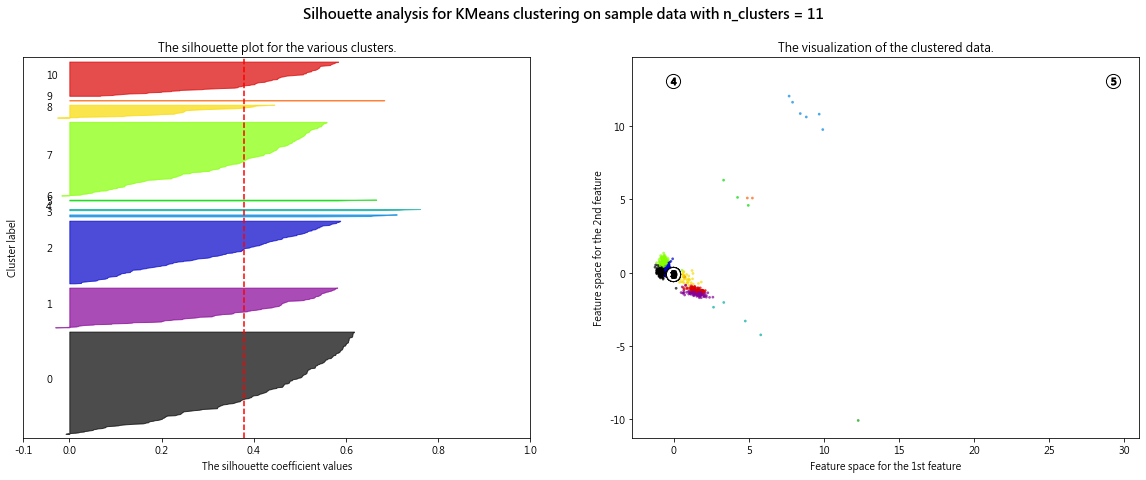

In [88]:
# silhouette_score plot
vs.Silhouette_score(r = 12, df = Oversea_scaled_features_df, reduced_df = reduced_data)
plt.savefig('Oversea_2019'+ '_Silhouette_score' + '.png')

## K Prototype Clustering

In [97]:
Oversea_scaledfeat_w_prop_df = Oversea_scaled_features_df
Oversea_scaledfeat_w_prop_df['Age_bins'] = Oversea_flat['Age_bins']
Oversea_scaledfeat_w_prop_df['Gender'] = Oversea_flat['Gender']
Oversea_scaledfeat_w_prop_df['Constellation'] = Oversea_flat['Constellation']
Oversea_scaledfeat_w_prop_df['Com_ID'] = Oversea_flat['Com_ID']
Oversea_scaledfeat_w_prop_df['Sales_ID'] = Oversea_flat['Sales_ID']

In [101]:
from kmodes.kprototypes import KPrototypes

# K Prototype Clustering
best_size = 5
kproto = KPrototypes(n_clusters = best_size, init='Cao', verbose=2)
kproto_preds = kproto.fit_predict(Oversea_scaledfeat_w_prop_df, categorical=[8, 9, 10, 11, 12])
kproto_centers = kproto.cluster_centroids_

Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run: 1, iteration: 1/100, moves: 159, ncost: 4200.478836586937
Run: 1, iteration: 2/100, moves: 35, ncost: 4159.834884616643
Run: 1, iteration: 3/100, moves: 21, ncost: 4143.622747411033
Run: 1, iteration: 4/100, moves: 12, ncost: 4142.953117692515
Run: 1, iteration: 5/100, moves: 3, ncost: 4142.798885139905
Run: 1, iteration: 6/100, moves: 1, ncost: 4142.783507366043
Run: 1, iteration: 7/100, moves: 0, ncost: 4142.783507366043
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run: 2, iteration: 1/100, moves: 182, ncost: 5116.95772961081
Run: 2, iteration: 2/100, moves: 109, ncost: 4994.712615925728
Run: 2, iteration: 3/100, moves: 60, ncost: 4717.062991302495
Run: 2, iteration: 4/100, moves: 23, ncost: 4142.4212289458155
Run: 2, iteration: 5/100, moves: 1, ncost: 4142.412098501868
Run: 2, iteration: 6/100, moves: 1, ncost: 4142.395253943132
Run: 2, iteration: 7/100, moves: 0, 

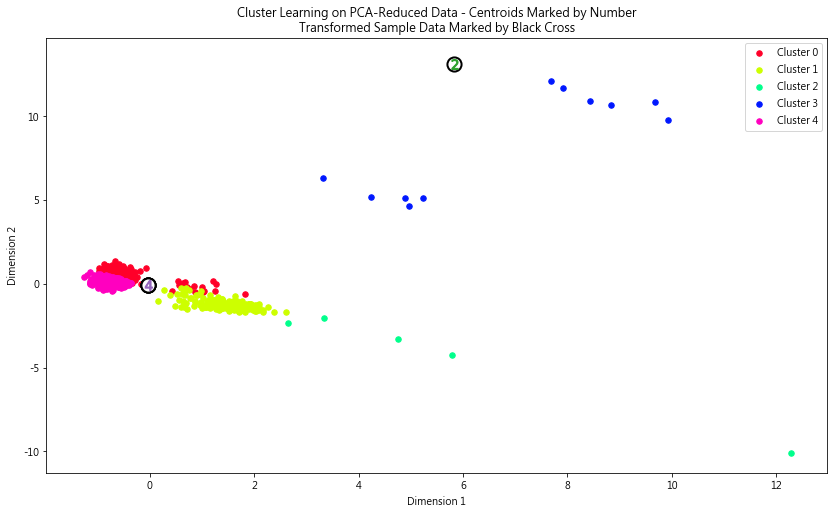

In [102]:
# Plot k prototype
vs.cluster_results(reduced_data, kproto_preds, kproto_centers[0])

## Data Recovery

In [103]:
# ## K mode
# # Inverse transform the box-cox centers
# true_centers = bc.inverse_transform(kproto_centers[0])
# true_centers[np.isnan(true_centers)] = 1
# df1 = pd.DataFrame(kproto_centers[1], columns = Oversea_scaledfeat_w_prop_df.iloc[:,[7, 8, 9, 10, 11]].keys())
# df2 = pd.DataFrame(np.round(true_centers), columns = Oversea_scaled_features_df.iloc[:,:13].keys())

# Display the true centers
kmeans_centers = 5
segments = ['Segment {}'.format(i) for i in range(0,kmeans_centers)]
true_centers_true = pd.DataFrame(kproto_centers[1], columns = Oversea_scaledfeat_w_prop_df.iloc[:,[8, 9, 10, 11, 12]].keys())
true_centers_true.index = segments
display(true_centers_true)

# Segment mean
Oversea_flat['Label'] = kproto.labels_
display(round(Oversea_flat.groupby('Label').mean()))

Target_Country,Age_bins,Gender,Constellation,Com_ID,Sales_ID
Segment 0,50-59,MALE,雙魚座,5850,85343
Segment 1,40-49,FEMALE,獅子座,5850,92018
Segment 2,0-19,OTHER,巨蟹座,5850,87172
Segment 3,50-59,FEMALE,獅子座,5850,1099
Segment 4,50-59,FEMALE,處女座,585H,85344


Target_Country,印尼,日本,深港通,滬港通,美國,香港,Buy_Amount,Age,Sales_ID
Label,,,,,,,,,
0,1.0,1.0,1.0,1.0,1394545.0,2779867.0,4174411.0,49.0,65069.0
1,1.0,1.0,1.0,1.0,3869648.0,16179.0,3885827.0,47.0,56907.0
2,607174.0,11049168.0,1.0,1.0,27307425.0,2163320.0,41127086.0,19.0,87803.0
3,1.0,1.0,5922296.0,6321631.0,2418557.0,3825223.0,18487705.0,45.0,60151.0
4,1.0,1.0,1.0,1.0,1.0,27037.0,27037.0,49.0,65754.0


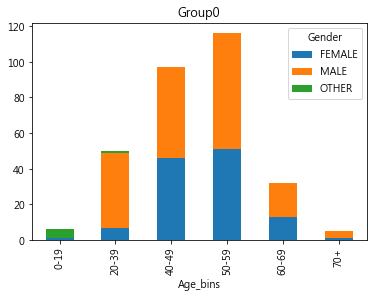

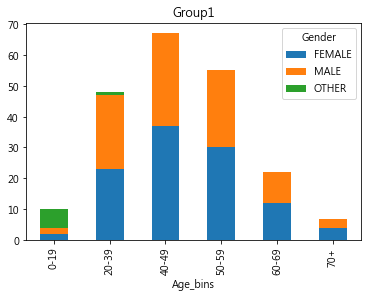

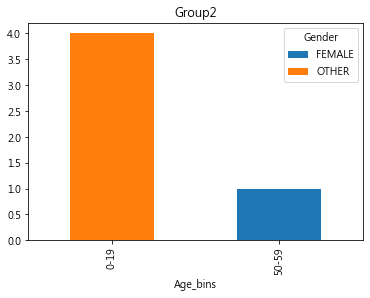

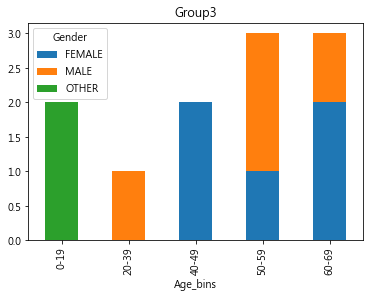

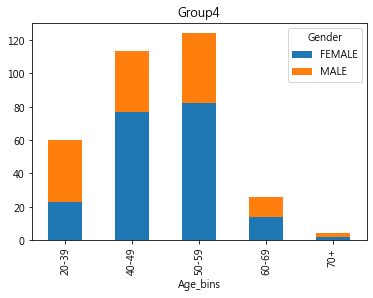

In [104]:
# Plot the Age_Sex features
for tag in np.sort(Oversea_flat['Label'].unique()):
    filter_ = Oversea_flat['Label'] == tag
    ct = pd.crosstab(Oversea_flat[filter_].Age_bins, Oversea_flat[filter_].Gender, margins = False)
    ct.plot.bar(stacked=True)
    plt.title('Group{}'.format(tag))

In [105]:
# Plot the Com_ID_df features
Oversea_scaledfeat_w_prop_df['Label'] = kproto.labels_
for tag in np.sort(Oversea_scaledfeat_w_prop_df['Label'].unique()):
    filter_ = Oversea_scaledfeat_w_prop_df['Label'] == tag
    Com_ID_df = Oversea_scaledfeat_w_prop_df[filter_].groupby('Com_ID').size().to_frame(name = 'Size')
    print('Gp_{}'.format(tag))
    display(Com_ID_df.sort_values(by = 'Size',ascending = False)[:5])

Gp_0


,Size
Com_ID,
5850,40
585D,21
585J,18
5856,16
5857,14


Gp_1


,Size
Com_ID,
5850,39
585Z,23
5857,18
585b,11
585Q,10


Gp_2


,Size
Com_ID,
5850,4
585R,1


Gp_3


,Size
Com_ID,
5850,4
5857,1
585B,1
585H,1
585J,1


Gp_4


,Size
Com_ID,
585H,26
5856,23
5851,23
5853,22
585D,19


In [106]:
# Save Customer list (k mode)
Oversea_flat.loc[:,['Age', 'Gender', 'Label']].to_excel('Oversea_2019_Customer_list.xlsx')

## ANOVA test 

In [93]:
# ANOVA test (k means)
import scipy.stats as ss
Oversea_flat_t = Oversea_flat.drop(['Gender','Age_bins','Constellation','Com_ID','Sales_ID'], axis = 1)
Oversea_flat_t['Label'] = optimized_kmeans.labels_
for Variable in Oversea_flat_t.keys():
    samples = [val[1] for val in Oversea_flat_t.groupby('Label')[Variable]]
    f_val, p_val = ss.f_oneway(*samples)
    print('Variable: {}, F value: {:.3f}, p value: {:.3f}'.format(Variable, f_val, p_val))

Variable: 印尼, F value: 70.752, p value: 0.000
Variable: 日本, F value: 178.712, p value: 0.000
Variable: 深港通, F value: 55.377, p value: 0.000
Variable: 滬港通, F value: 55.670, p value: 0.000
Variable: 美國, F value: 32.270, p value: 0.000
Variable: 香港, F value: 0.980, p value: 0.401
Variable: Buy_Amount, F value: 26.413, p value: 0.000
Variable: Age, F value: 15.699, p value: 0.000
Variable: Label, F value: -455143047114022848.000, p value: nan


In [107]:
# ANOVA test (k mode)
import scipy.stats as ss
Oversea_flat_t = Oversea_flat.drop(['Gender','Age_bins','Constellation','Com_ID','Sales_ID'], axis = 1)
Oversea_flat_t['Label'] = kproto.labels_
for Variable in Oversea_flat_t.keys():
    samples = [val[1] for val in Oversea_flat_t.groupby('Label')[Variable]]
    f_val, p_val = ss.f_oneway(*samples)
    print('Variable: {}, F value: {:.3f}, p value: {:.3f}'.format(Variable, f_val, p_val))

Variable: 印尼, F value: 53.002, p value: 0.000
Variable: 日本, F value: 133.877, p value: 0.000
Variable: 深港通, F value: 37.651, p value: 0.000
Variable: 滬港通, F value: 28.679, p value: 0.000
Variable: 美國, F value: 14.828, p value: 0.000
Variable: 香港, F value: 10.069, p value: 0.000
Variable: Buy_Amount, F value: 16.357, p value: 0.000
Variable: Age, F value: 9.938, p value: 0.000
Variable: Label, F value: inf, p value: 0.000


C:\Users\User\anaconda3\lib\site-packages\scipy\stats\stats.py:3349: RuntimeWarning: divide by zero encountered in double_scalars
  f = msb / msw


In [108]:
# Chi-square for categorical var (k mode)
Oversea_scaledfeat_w_prop_df_chi = Oversea_scaledfeat_w_prop_df.iloc[:,-5:]

for Variable in Oversea_scaledfeat_w_prop_df_chi.keys():
    samples = pd.crosstab(index = Oversea_scaledfeat_w_prop_df_chi['Label'], \
                          columns = Oversea_scaledfeat_w_prop_df_chi[Variable])
    chisq, p_val, df, ex = ss.chi2_contingency(samples, correction = False)
    print('Variable: {}, chi value: {:.3f}, p value: {:.3f}'.format(Variable, chisq, p_val))

Variable: Gender, chi value: 189.771, p value: 0.000
Variable: Constellation, chi value: 59.060, p value: 0.064
Variable: Com_ID, chi value: 254.790, p value: 0.000
Variable: Sales_ID, chi value: 2006.024, p value: 0.075
Variable: Label, chi value: 3432.000, p value: 0.000


In [109]:
# Turkey HSD
from statsmodels.stats.multicomp import pairwise_tukeyhsd

writer = pd.ExcelWriter('Oversea_2019_Turkey_HSD_sheets.xlsx', engine='xlsxwriter')
for Variable in Oversea_flat_t.keys():
    Results = pairwise_tukeyhsd(Oversea_flat_t[Variable], Oversea_flat_t['Label'])
    pd.DataFrame(data=Results._results_table.data[1:], columns=Results._results_table.data[0])\
    .to_excel(writer, sheet_name = Variable)
writer.save()

C:\Users\User\anaconda3\lib\site-packages\statsmodels\sandbox\stats\multicomp.py:1291: RuntimeWarning: divide by zero encountered in true_divide
  st_range = np.abs(meandiffs) / std_pairs #studentized range statistic
